## Linear Regression
Linear regression is a fundamental supervised machine learning algorithm that models the relationship between a target variable ($y$) and one or more features ($x_i$) as a linear equation. The goal of linear regression is to find the best-fitting linear relationship between the variables.

Types of Linear Regression:
1. Simple Linear Regression: Involves one independent variable $x$ and a dependent variable $y$.       
   mathematical model: $ f_{w,b}(x) = y = w * x + b + \epsilon $
3. Multiple Linear Regression: Involves multiple independent variables $x_1,x_2, …,x_𝑛$ and a dependent variable $y$
 mathematical model : $f_{w,b}(x) = y = w_0x_0 + w_1x_1+... + w_{n}x_{n} + b=w \cdot x + b$


 **Key Components of Linear Regression**
- **Dependent Variable**: Represented as $y$, this is the variable the model aims to predict.
- **Independent Variable**: Denoted as $x$ these are the input variables that influence the dependent variable.
- **Coefficients**: Represented by $b$ (intercept) and $w$ (slopes), these are the parameters that the model estimates to define the linear relationship.
- **Residuals $\epsilon$** : The differences between the observed values and the values predicted by the model.

- The line/hyperplane represents the best possible fit to the data that captures the trend of how the dependent variable ($y$) changes in response to variations in the independent variable ($x_i$).
- Once the model is calibrated, it can be used to predict future outcomes by providing input features, allowing for forecasts based on the patterns identified in the data.

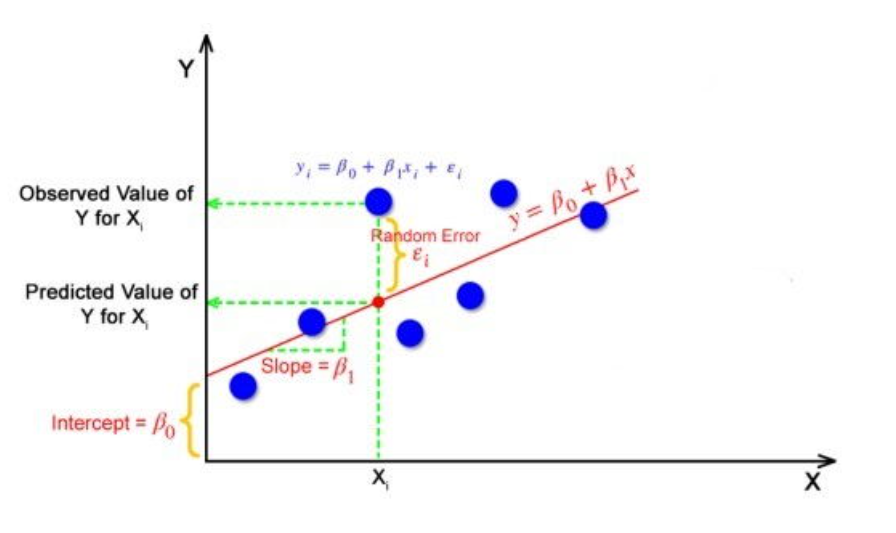


Image source: 
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/

**Dataset source**:
https://media.geeksforgeeks.org/wp-content/uploads/20240522154015/Salary_Data[1].csv

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [431]:
from sklearn.model_selection import train_test_split

In [432]:
# Load the custom dataset
data = pd.read_csv('salary_dataset.csv')

In [433]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Salary_lpa
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,10.8
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,7.8
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,18.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,7.2
4,52.0,Male,Master's,Director,20.0,200000.0,24.0


In [401]:
data.describe()

,Age,Years of Experience,Salary,Salary_lpa
count,6702.000000,6701.000000,6699.000000,6704.000000
mean,33.620859,8.094687,115326.964771,13.828914
std,7.614633,6.059003,52786.183911,6.343242
min,21.000000,0.000000,350.000000,0.000000
25%,28.000000,3.000000,70000.000000,8.400000
50%,32.000000,7.000000,115000.000000,13.800000
75%,38.000000,12.000000,160000.000000,19.200000
max,62.000000,34.000000,250000.000000,30.000000


In [402]:
print(data.isnull().sum())  # Check for missing values in each column

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Salary_lpa             0
dtype: int64


In [434]:
data.dropna(inplace=True)  # Remove rows with missing values
print(data.isnull().sum())  # Check for missing values in each column

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Salary_lpa             0
dtype: int64


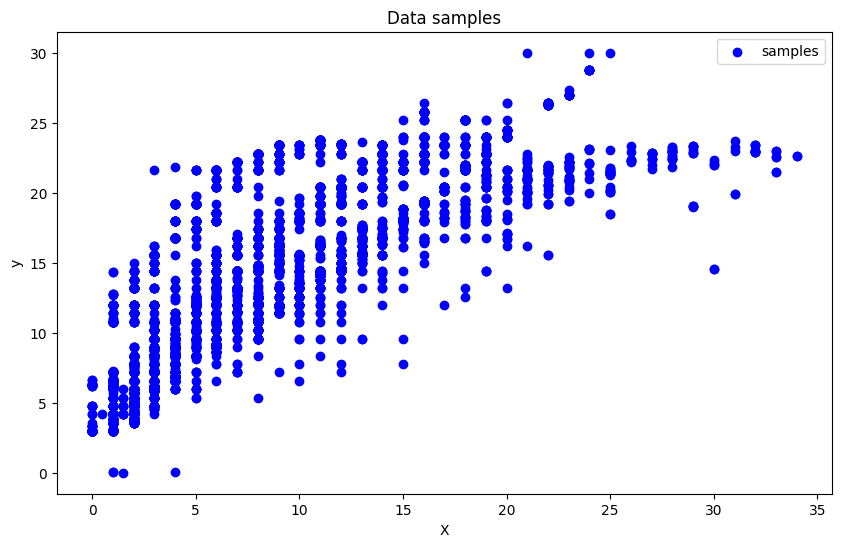

In [435]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="samples")
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data samples')
plt.legend()
plt.show()

In [405]:
# Assign data wrt to their variables
X = data[['Years of Experience']]  # keep it as a 2D array
y = data['Salary_lpa']    # y can remain a 1D array

In [406]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**The prediction function computes the predicted values for input features using the current weights and bias**

In [407]:
def predict(X, w, b):
    """ X: Input features
        w: Weights (slope)
        b: Bias (intercept) """
    pred = np.dot(X, w) + b
    return pred

**The loss function measures how well our predicted values match the actual values. we'll use Mean Squared Error** 

${MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ 

- $n \text{ is the number of data points.}$

- $y_i \text{ is the true value for the } i\text{-th data point.}$

- $\hat{y}_i \text{ is the predicted value for the } i\text{-th data point.}$



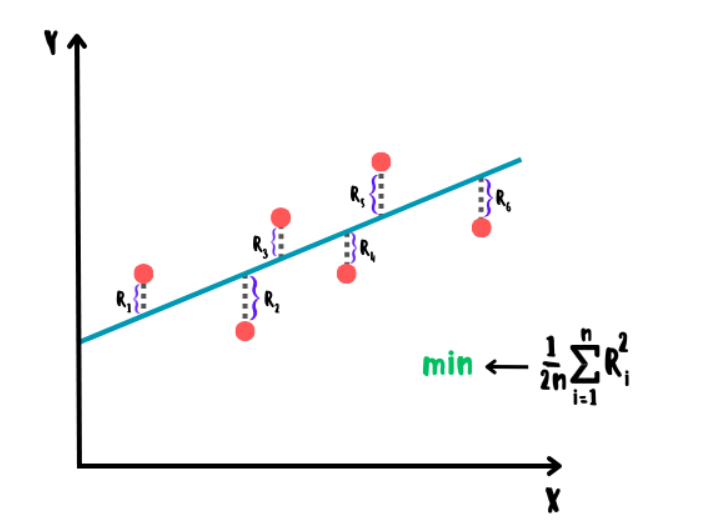

image source: https://www.kaggle.com/code/egazakharenko/linear-regression-from-scratch-its-types

**The choice of a regression line (plane) that describes the relationship of the data in the best way is to minimize the cost function, that means the line should pass through the data in a such way that, on average, the difference between the squares of the expected and real values is minimal.**

In [437]:
def loss_function(y_true, y_pred):
    """
    y_true: Actual target values
    y_pred: Predicted target values
    """
    loss = np.mean((y_true - y_pred) ** 2)
    return loss

**The gradient descent function updates the weights and bias based on the computed gradients of the loss function**


**Linear Regression Based on Gradient Descent**

1. **Initialization**: Set the initial values of weights, bias, and their gradients to zero.
2. **Prediction**: Make a prediction based on the current values of the weights and bias.
3. **Update**: Recalculate the weights and bias based on the prediction, and update the gradients (difference between current and previous iteration values).
4. **Iteration**: Repeat steps 2-3 until the gradient decrease to smaller value


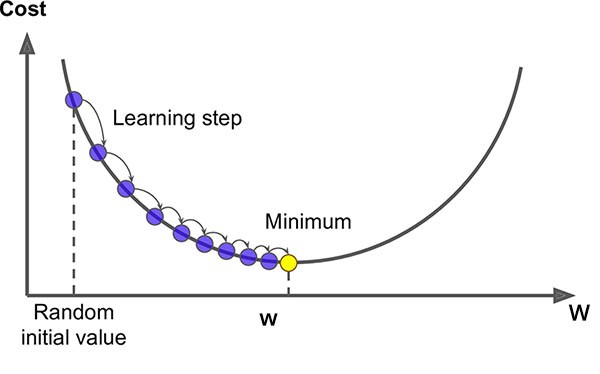


Image source: https://mlpills.dev/machine-learning/gradient-descent/

**Gradient Descent Equations for Linear Regression**

$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (f_{w,b}(x_i) - y_i) = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$

$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (f_{w,b}(x_i) - y_i) x_i = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) x_i
$

**Repeat until convergence**:

$
b_j = b_{j-1} - \alpha \frac{\partial J(w,b)}{\partial b_j}
$

$
w_j = w_{j-1} - \alpha \frac{\partial J(w,b)}{\partial w_j}
$

Where:

- \($\alpha$) — learning rate
- \( j \) — current iteration for bias and weights
- \( w,b \) — learning parameters


In [438]:
def update_weights(X, y, w, b, lr):
    """
    X: Input features
    y: Actual target values
    w: Current weights
    b: Current bias
    learning_rate: Step size for gradient update
    """
    m = len(y)
    
    # Predicted values
    y_pred = predict(X, w, b)
    
    # Compute gradients
    dw = (-2/m) * np.dot(X.T, (y - y_pred))
    db = (-2/m) * np.sum(y - y_pred)
    
    # Update weights and bias
    w = w - lr * dw
    b = b - lr * db
    
    return w, b

**The goal of the algorithm is to get the best values for b and w to find the best-fit line. 
The best-fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.**

In [410]:
def train(X, y, learning_rate=0.01, n_iters=1000):
    """
    X: Input features
    y: Target values
    learning_rate: Step size for gradient descent
    n_iters: Number of iterations for training
    """
    # Initialize weights and bias
    w = np.zeros((X.shape[1], 1))
    b = 0
    
    # To store the loss at each iteration for visualization
    loss_history = []
    saved_lines = []  # To store model predictions every 100 iterations
    
    # Gradient descent loop
    for i in range(n_iters):
        # Predict and compute loss
        y_pred = predict(X, w, b)
        loss = loss_function(y, y_pred)
        loss_history.append(loss)
        
        # Update weights and bias
        w, b = update_weights(X, y, w, b, learning_rate)
        
        # Save predictions every 100 iterations
        if i % 10 == 0:
            saved_lines.append((i, w.copy(), b))
            print(f"Iteration {i}: Loss = {loss}")
    
    return w, b, loss_history, saved_lines


In [439]:
def visualize_lines(saved_lines, X, y):
    plt.figure(figsize=(15, 10)) 

    for i, (iteration, w, b) in enumerate(saved_lines):
        plt.subplot(3, 4, i + 1)  # 3x4 grid of subplots
        plt.scatter(X, y, color='blue', label='Data Points')  # Original data points
        
        #predictions for the current weights and bias
        y_pred = predict(X, w, b)
        plt.plot(X, y_pred, color='red', label='Prediction Line')
        
        plt.title(f'Iteration {iteration}')
        plt.xlabel('Feature (d)')
        plt.ylabel('Salary (e)')
        plt.legend()

    plt.tight_layout()
    plt.show()

In [442]:
# Train the model with visualization
learning_rate = 0.001
n_iters = 100
w, b, loss_history, saved_lines = train(X_train.values, y_train.values.reshape(-1, 1), learning_rate, n_iters)

Iteration 0: Loss = 231.93795512885916
Iteration 10: Loss = 32.409329118179755
Iteration 20: Loss = 30.14697512092622
Iteration 30: Loss = 29.896993109824205
Iteration 40: Loss = 29.670693871224987
Iteration 50: Loss = 29.44777802567217
Iteration 60: Loss = 29.22799469976905
Iteration 70: Loss = 29.011297832057515
Iteration 80: Loss = 28.797644058034443
Iteration 90: Loss = 28.586990643048438


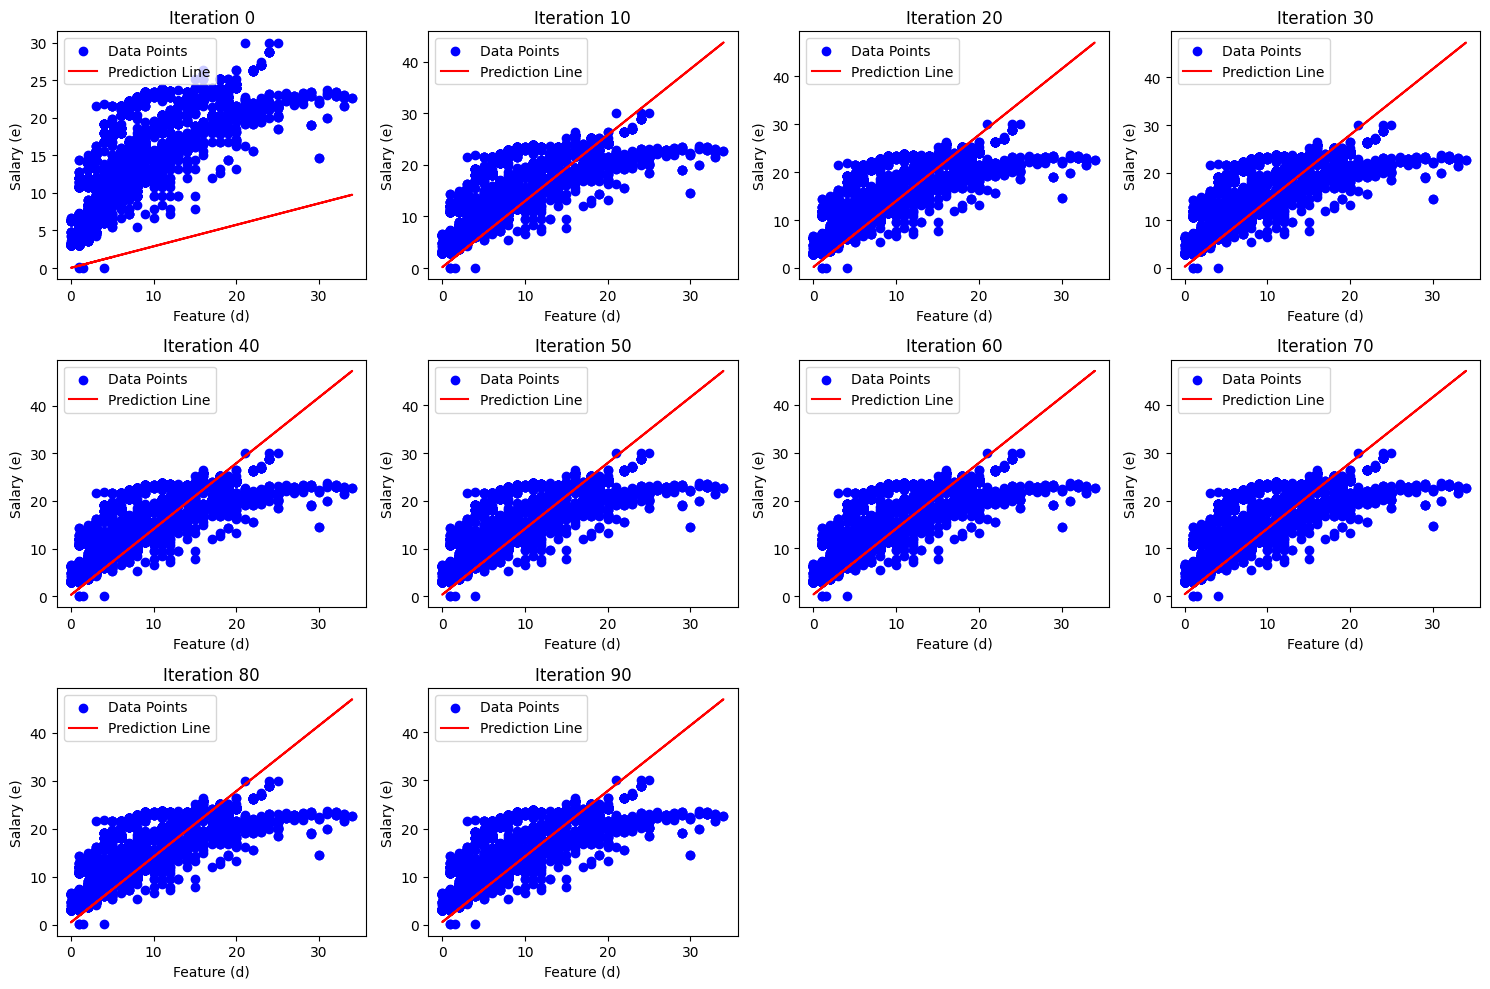

In [443]:
visualize_lines(saved_lines, X, y)

In [444]:
def plot_loss(loss_history):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history, color='blue', label='Loss')
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()
    plt.show()

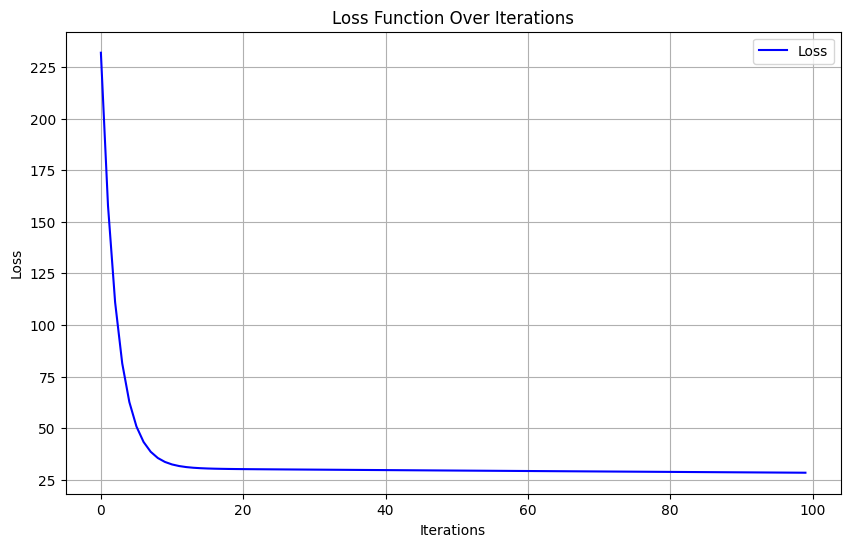

In [445]:
# loss values collected during training
plot_loss(loss_history)

In [447]:
y_test_pred = predict(13, w, b)
y_test_pred

array([[18.25864128]])

In [448]:
# Predict on the test set
y_test_pred = predict(X_test.values, w, b)

In [450]:
# Compute test loss
test_loss = compute_loss(y_test.values.reshape(-1, 1), y_test_pred)
print(f"Test Loss: {test_loss}")

Test Loss: 29.6896205191209


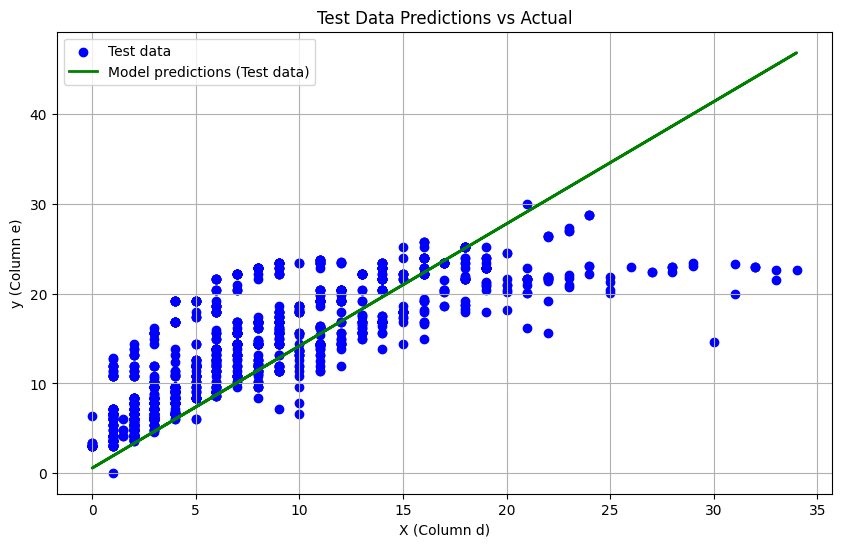

In [451]:
# Visualize predictions on the test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Test data")
plt.plot(X_test, y_test_pred, color="green",linewidth=2, label="Model predictions (Test data)")
plt.xlabel('X (Column d)')
plt.ylabel('y (Column e)')
plt.title('Test Data Predictions vs Actual')
plt.legend()
plt.grid()
plt.show()